
--- Informasi Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null  

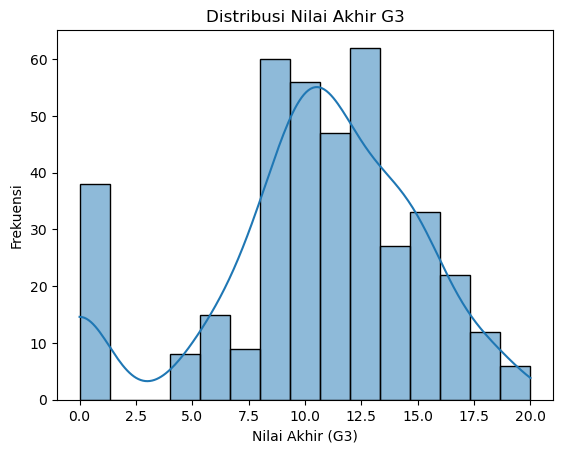

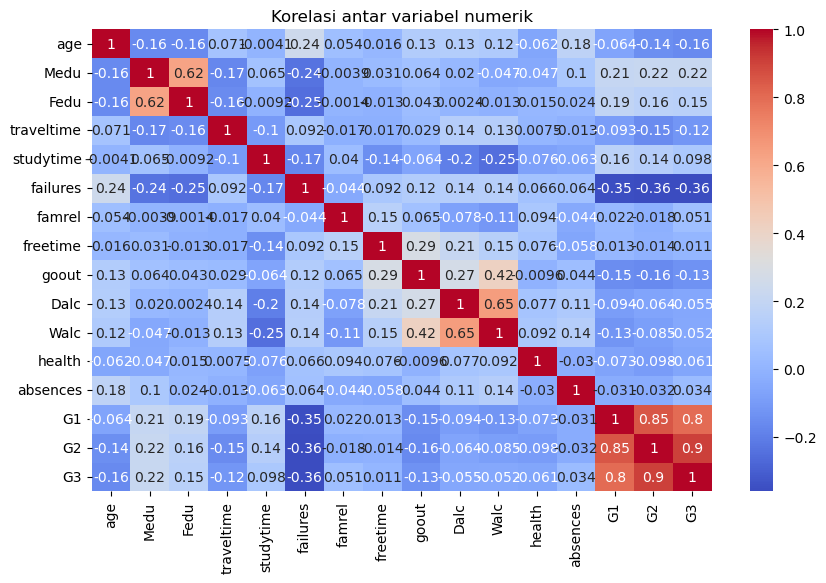


--- Regresi Linear ---
R^2 Score: 0.7018494600312821
RMSE: 2.472567676537483


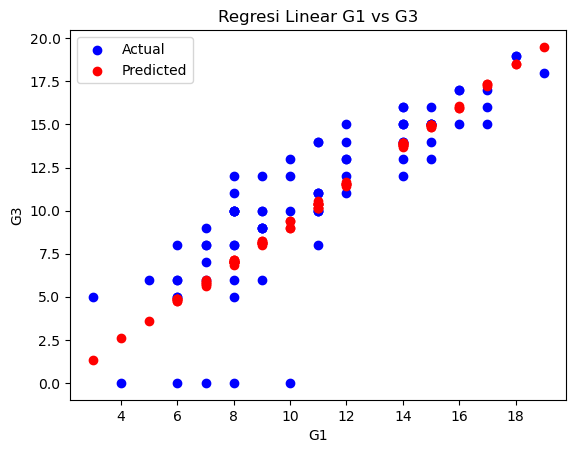

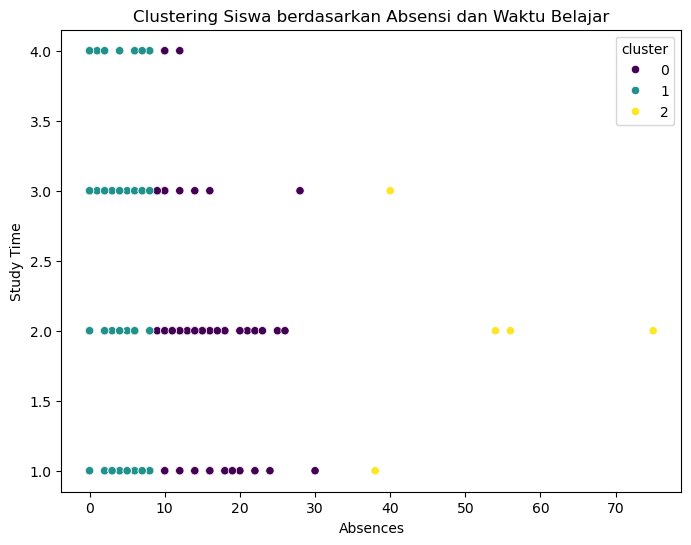


--- Klasifikasi ---
              precision    recall  f1-score   support

           0       0.63      0.54      0.58        59
           1       0.60      0.68      0.64        60

    accuracy                           0.61       119
   macro avg       0.62      0.61      0.61       119
weighted avg       0.62      0.61      0.61       119



In [1]:
# UAS Data Science IF405 - Analisis Student Performance Dataset
# Nama: RANDA SAHPUTRA SARAGIH
# NIM: 240401020212

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, classification_report

# Load Dataset
url = "student-mat.csv"
df = pd.read_csv(url, sep=';')

# --- EDA ---
print("\n--- Informasi Data ---")
print(df.info())

print("\n--- Statistik Deskriptif ---")
print(df.describe())

print("\n--- Cek Missing Values ---")
print(df.isnull().sum())

# Visualisasi distribusi nilai akhir
sns.histplot(df['G3'], bins=15, kde=True)
plt.title("Distribusi Nilai Akhir G3")
plt.xlabel("Nilai Akhir (G3)")
plt.ylabel("Frekuensi")
plt.show()

# Heatmap korelasi numerik (perbaikan untuk menghindari error string)
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar variabel numerik")
plt.show()

# --- REGRESI LINEAR ---
X = df[['G1', 'studytime']]
y = df['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("\n--- Regresi Linear ---")
print("R^2 Score:", r2_score(y_test, pred))
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

plt.scatter(X_test['G1'], y_test, color='blue', label='Actual')
plt.scatter(X_test['G1'], pred, color='red', label='Predicted')
plt.xlabel("G1")
plt.ylabel("G3")
plt.title("Regresi Linear G1 vs G3")
plt.legend()
plt.show()

# --- CLUSTERING ---
X_cluster = df[['absences', 'studytime']]
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
df['cluster'] = kmeans.fit_predict(X_cluster)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='absences', y='studytime', hue='cluster', data=df, palette='viridis')
plt.title("Clustering Siswa berdasarkan Absensi dan Waktu Belajar")
plt.xlabel("Absences")
plt.ylabel("Study Time")
plt.show()

# --- KLASIFIKASI ---
df['pass'] = (df['G3'] > 10).astype(int)
df['sex'] = LabelEncoder().fit_transform(df['sex'])

X_class = df[['sex', 'studytime', 'failures']]
y_class = df['pass']

X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.3, random_state=1)
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n--- Klasifikasi ---")
print(classification_report(y_test, y_pred))